<a href="https://colab.research.google.com/github/c-schafer/Global-CO2-Modeling/blob/main/Schafer_Global_Temp_vs_Carbon_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
# fetch data from github repository
data_url = 'https://raw.githubusercontent.com/c-schafer/Global-CO2-Modeling/main/Raw_Data/DATA_baseline_co2_temp.csv?token=GHSAT0AAAAAABYLUF7W2RGMWST6L4V2PVKWYYTXKNA'
data = pd.read_csv(data_url)
data.head()

,Year,CO2 Concentration,Temp (ºC above 20th century avg
0,1959,315.98,0.08
1,1960,316.91,0.05
2,1961,317.64,0.09
3,1962,318.45,0.10
4,1963,318.99,0.12


In [ ]:
# reformatting
data.columns = ['year','carbon','temp']
data.head()

,year,carbon,temp
0,1959,315.98,0.08
1,1960,316.91,0.05
2,1961,317.64,0.09
3,1962,318.45,0.10
4,1963,318.99,0.12


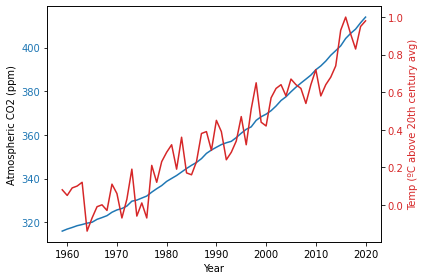

In [ ]:
# Initial plot of both temp and co2 vs. time
%matplotlib inline
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Atmospheric CO2 (ppm)')
ax1.plot(data.year, data.carbon)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Temp (ºC above 20th century avg)', color=color)  # we already handled the x-label with ax1
ax2.plot(data.year, data.temp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# fit lin reg model for temperature vs year
temp_reg = linear_model.LinearRegression()
temp_reg.fit(data[['year']], data.temp)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
temp_reg.coef_

array([0.01584876])

In [ ]:
temp_reg.intercept_

-31.16481226864095

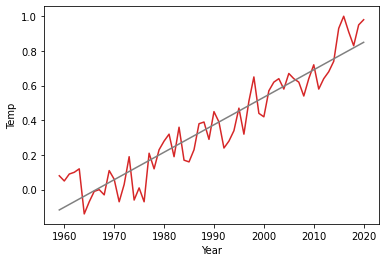

In [ ]:
# plot line of best fit through temp data
plt.xlabel('Year')
plt.ylabel('Temp')
plt.plot(data.year, data.temp, "tab:red")
x = np.linspace(1959,2020,62)
y = (temp_reg.coef_)*x + temp_reg.intercept_
plt.plot(x, y, "gray")

In [ ]:
# find difference between line of best fit and real temp data
arr = []
i = 0
while (i < len(data.year)):
  best_fit = ((temp_reg.coef_)*(data.year.iloc[i]) + temp_reg.intercept_).item(0)
  real = data.temp.iloc[i]
  diff = best_fit - real
  #print(best_fit)
  arr.append(diff)
  i = i + 1

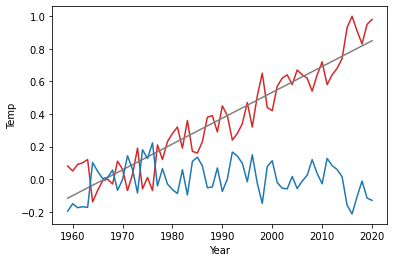

In [ ]:
# plot this difference
plt.xlabel('Year')
plt.ylabel('Temp')
plt.plot(data.year, data.temp, "tab:red")
x = np.linspace(1959,2020,62)
y = (temp_reg.coef_)*x + temp_reg.intercept_
plt.plot(x, y, "gray")
#diff_df.size
plt.plot(data.year,arr, "tab:blue")

In [ ]:
# On average, how far each data point lies from the mean
np.std(arr)

0.10425469682923232

In [ ]:
data.corr()

,year,carbon,temp
year,1.000000,0.991388,0.938598
carbon,0.991388,1.000000,0.954437
temp,0.938598,0.954437,1.000000


In [ ]:
data.temp.std()

0.30464294537557796

In [ ]:
carbon_reg = linear_model.LinearRegression()
carbon_reg.fit(data[['year']], data.carbon)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
carbon_reg.coef_

array([1.5951759])

In [ ]:
carbon_reg.intercept_

-2817.3219609176303

In [ ]:
carbon_reg.predict([[2050]])

array([452.78862557])

In [ ]:
#year_url = 'https://raw.githubusercontent.com/c-schafer/Global-CO2-Modeling/main/Raw_Data/TEST_year_values.csv?token=GHSAT0AAAAAABYLUF7XAGXYTUYA42WAXTGEYYTXNIQ'
#year_values = pd.read_csv(year_url)
#year_values.head(3)

In [ ]:
# create DataFrame with years 1960-2100
yrs = {'year':np.linspace(1960, 2100, 15)}
year_values = pd.DataFrame(yrs)
year_values.head(3)

,year
0,1960.0
1,1970.0
2,1980.0


In [ ]:
fit = carbon_reg.predict(year_values)
fit

array([309.22279494, 325.1745539 , 341.12631286, 357.07807182,
       373.02983078, 388.98158974, 404.93334869, 420.88510765,
       436.83686661, 452.78862557, 468.74038453, 484.69214349,
       500.64390245, 516.5956614 , 532.54742036])

In [ ]:
year_values['pred_co2'] = fit
year_values.head(3)

,year,pred_co2
0,1960.0,309.222795
1,1970.0,325.174554
2,1980.0,341.126313


In [ ]:
#year_values.to_excel("co2_prediction.xlsx",index=False)

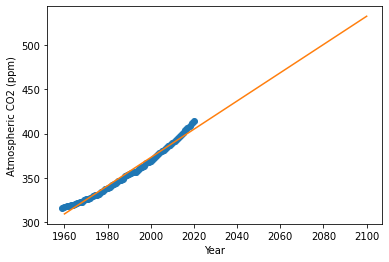

In [ ]:
plt.xlabel('Year')
plt.ylabel('Atmospheric CO2 (ppm)')
plt.scatter(data.year, data.carbon)
plt.plot(year_values.year, fit, "tab:orange")